In [1]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


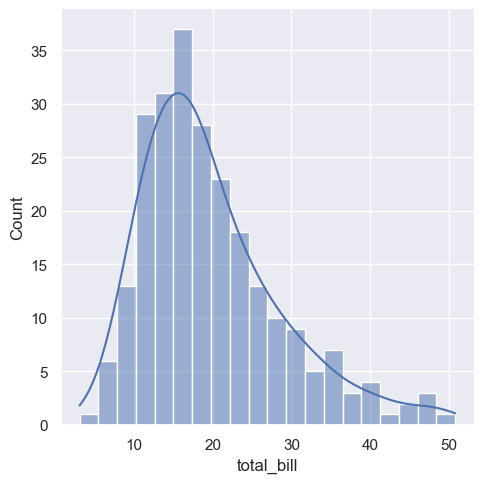

In [3]:
sns.displot(tips['total_bill'], kde=True, bins=20) # kde = kernel density estimation
plt.show()

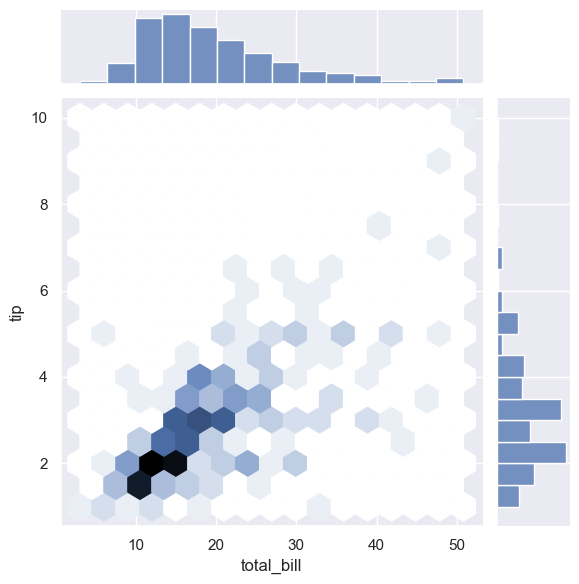

In [4]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex') # kind def is scatter
plt.show()

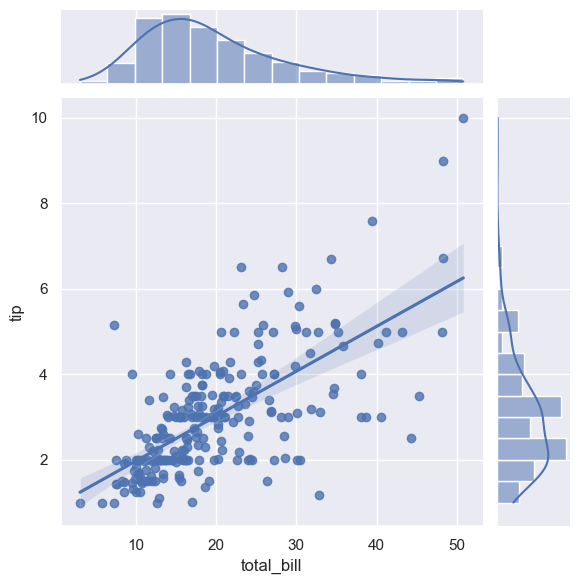

In [5]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')
plt.show()

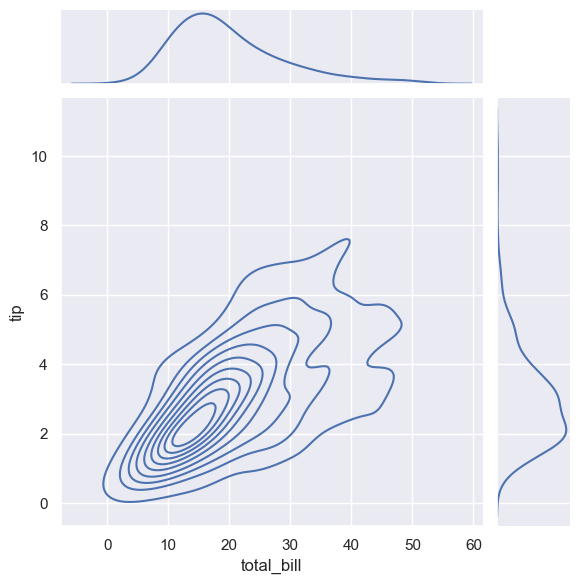

In [6]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')
plt.show()

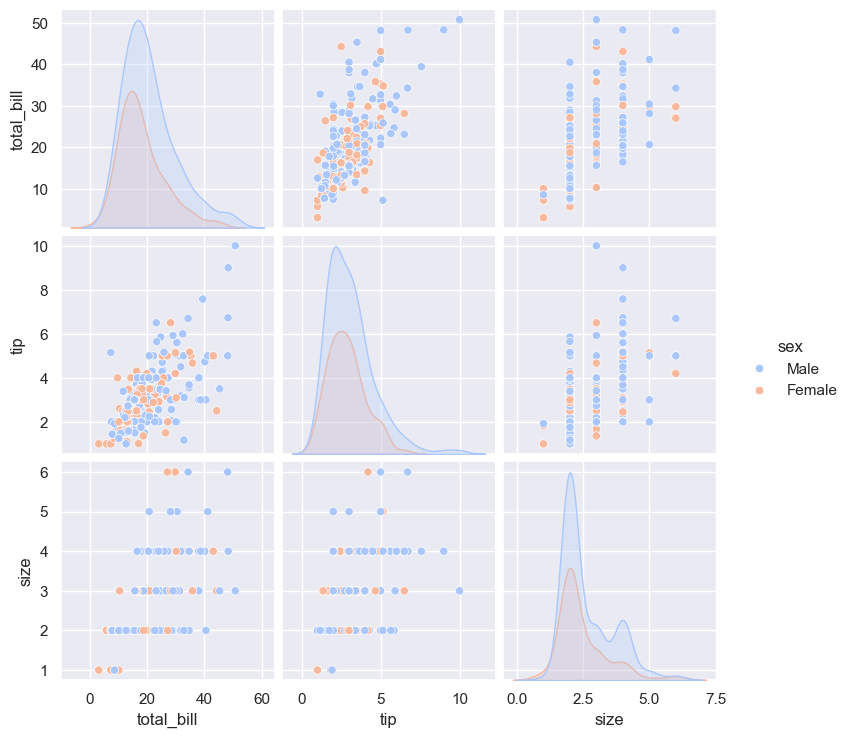

In [7]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

<Axes: xlabel='total_bill'>

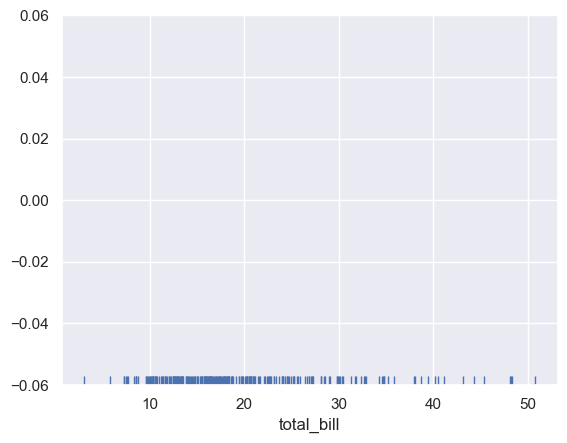

In [8]:
sns.rugplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Density'>

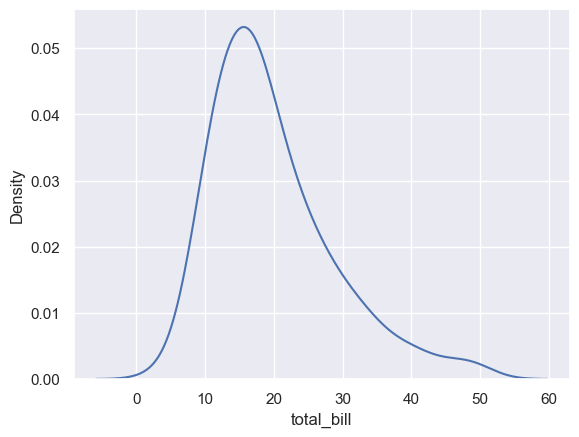

In [9]:
sns.kdeplot(tips['total_bill'])

<Axes: xlabel='sex', ylabel='total_bill'>

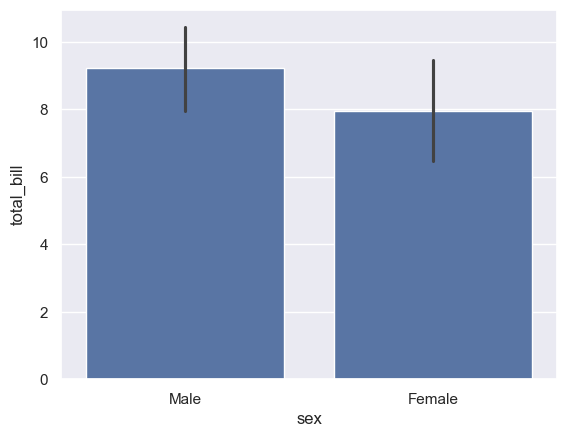

In [10]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

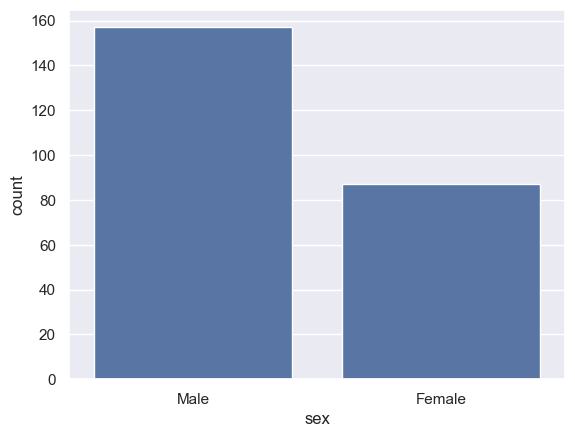

In [11]:
#sns.set_style('ticks') # darkgrid whitegrid
#sns.despine(left=True, bottom=True)
#sns.set_context('poster', font_scale=0.5) # notebook
sns.countplot(x='sex', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

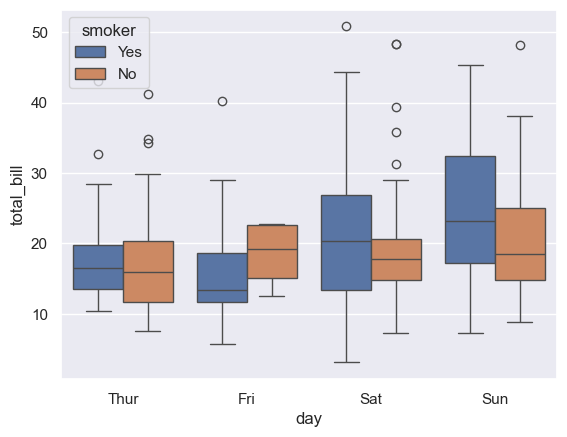

In [12]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

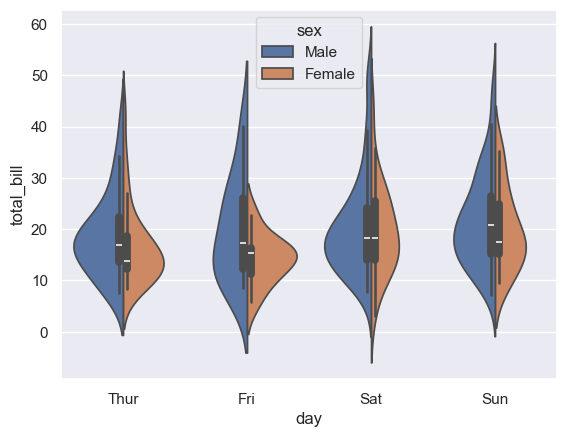

In [13]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

<Axes: xlabel='day', ylabel='total_bill'>

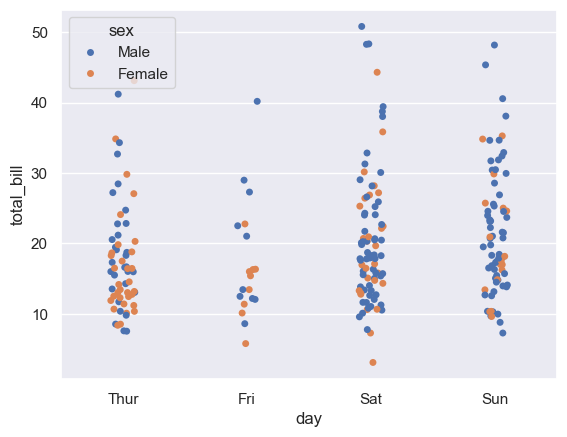

In [14]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

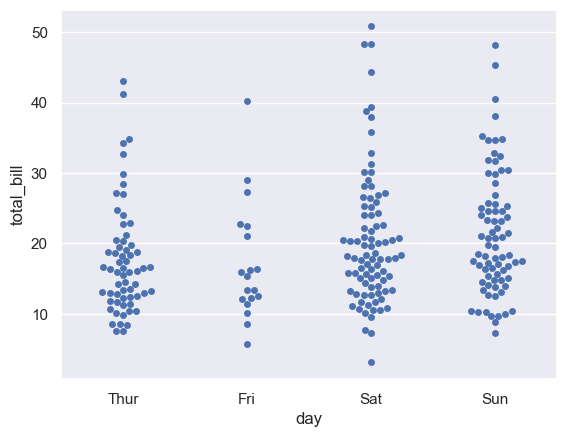

In [15]:
sns.swarmplot(x='day', y='total_bill', data=tips) # strip + violin

In [16]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [17]:
tc = tips.corr(numeric_only=True)
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

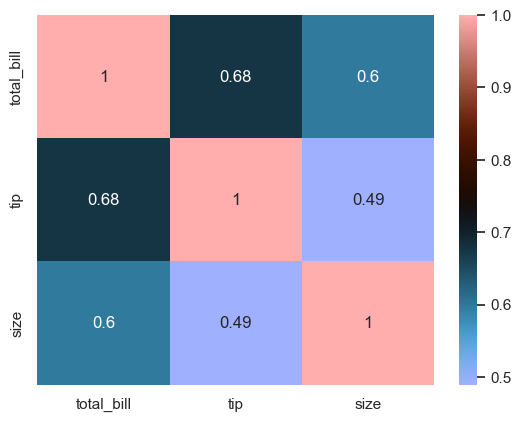

In [18]:
sns.heatmap(tc, annot=True, cmap='berlin')

In [19]:
fp = flights.pivot_table(index='month', columns='year', values='passengers', observed=False)
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

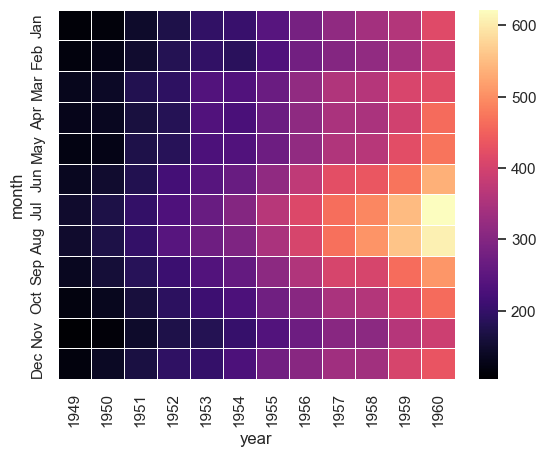

In [20]:
sns.heatmap(fp, cmap='magma', linecolor='white', linewidth=.5)

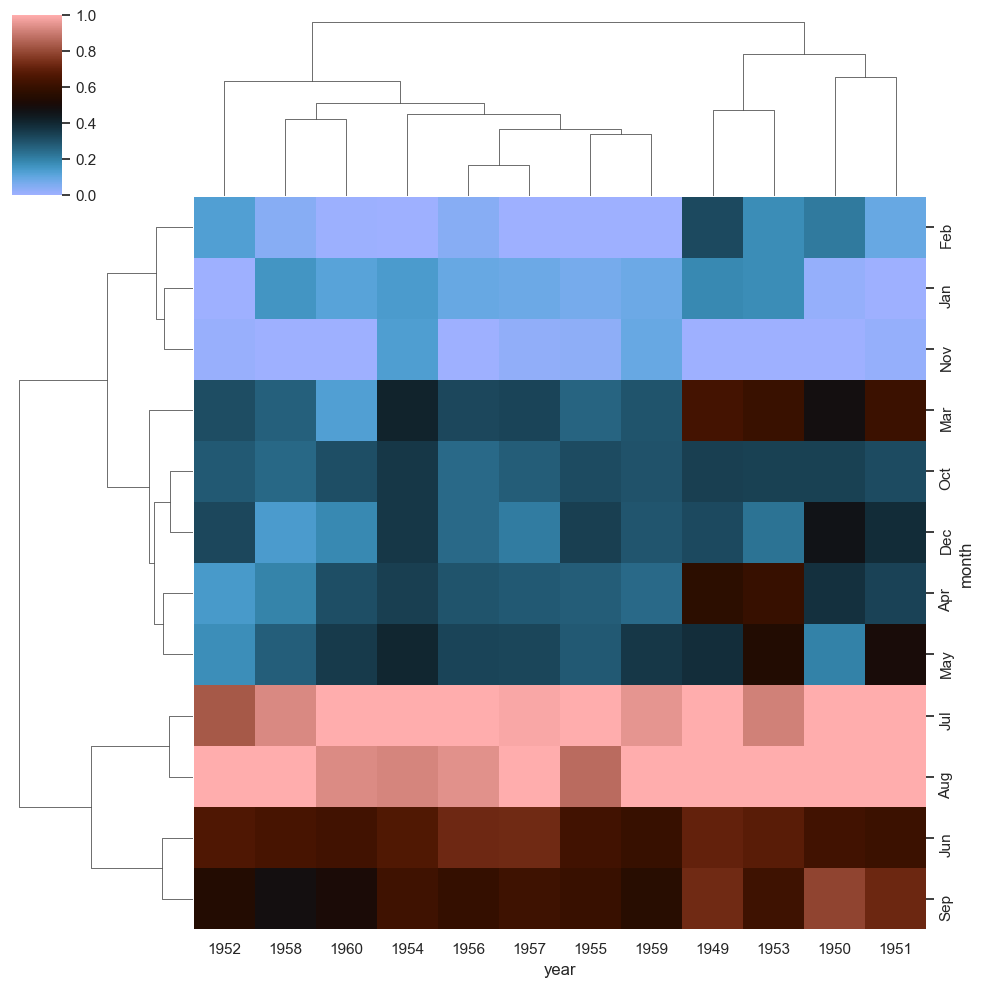

In [21]:
sns.clustermap(fp, cmap='berlin', standard_scale=1)

In [22]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


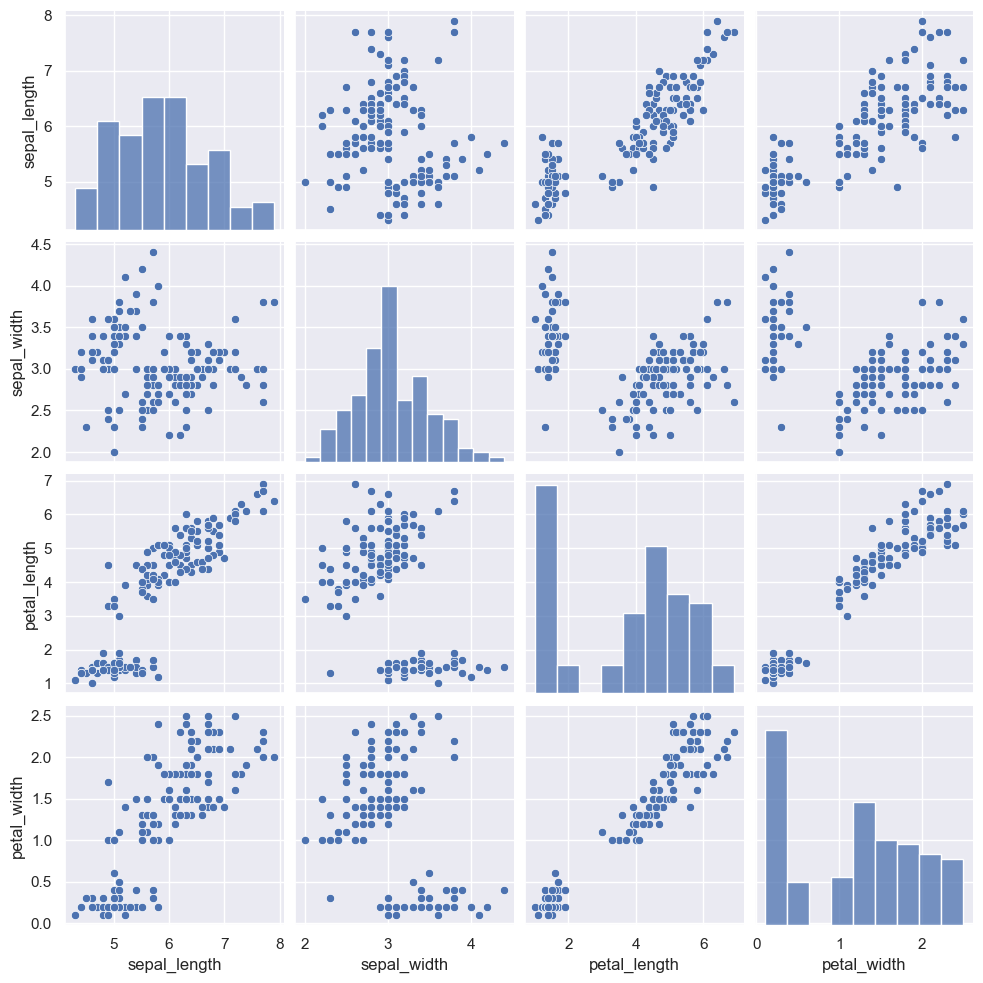

In [23]:
sns.pairplot(iris)

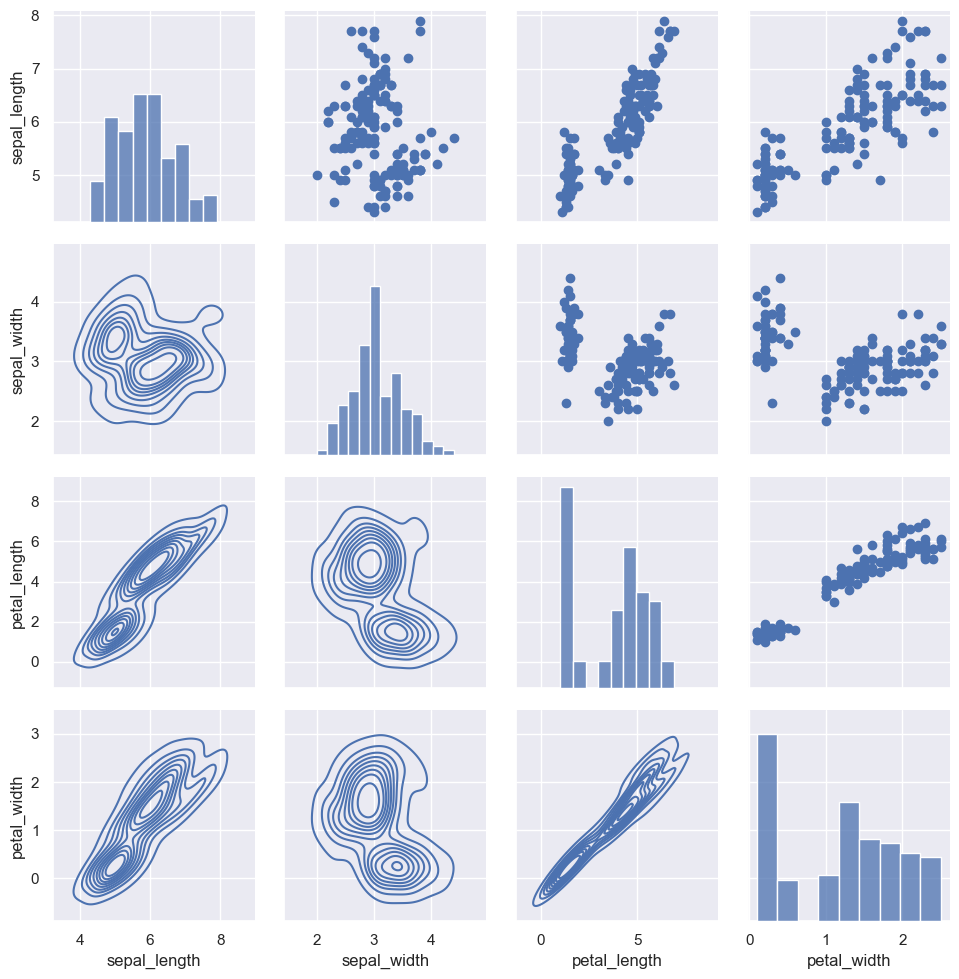

In [24]:
pg = sns.PairGrid(iris)
pg.map_diag(sns.histplot)
pg.map_upper(plt.scatter)
pg.map_lower(sns.kdeplot)

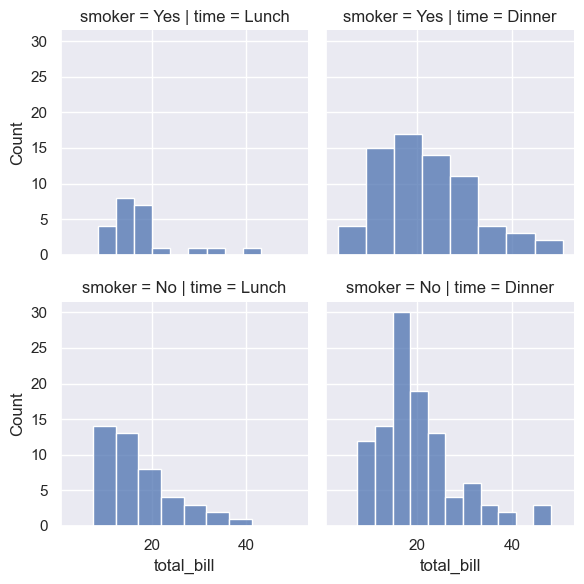

In [25]:
fg = sns.FacetGrid(data=tips, col='time', row='smoker')
fg.map(sns.histplot, 'total_bill')

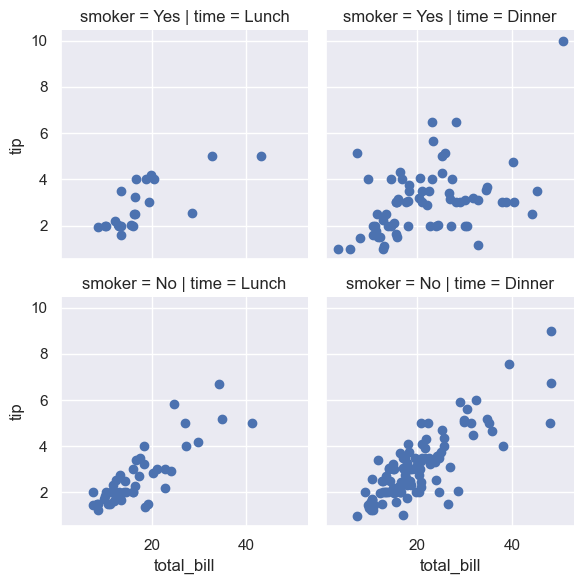

In [26]:
fg = sns.FacetGrid(data=tips, col='time', row='smoker')
fg.map(plt.scatter, 'total_bill', 'tip')

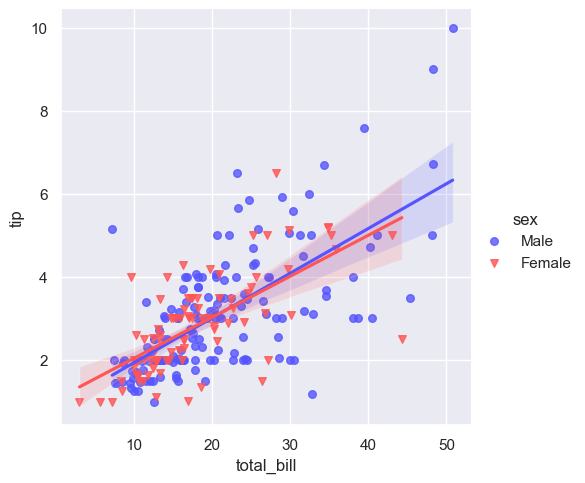

In [27]:
# linear model plot
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'],
           scatter_kws={'s': 30}, palette='seismic')

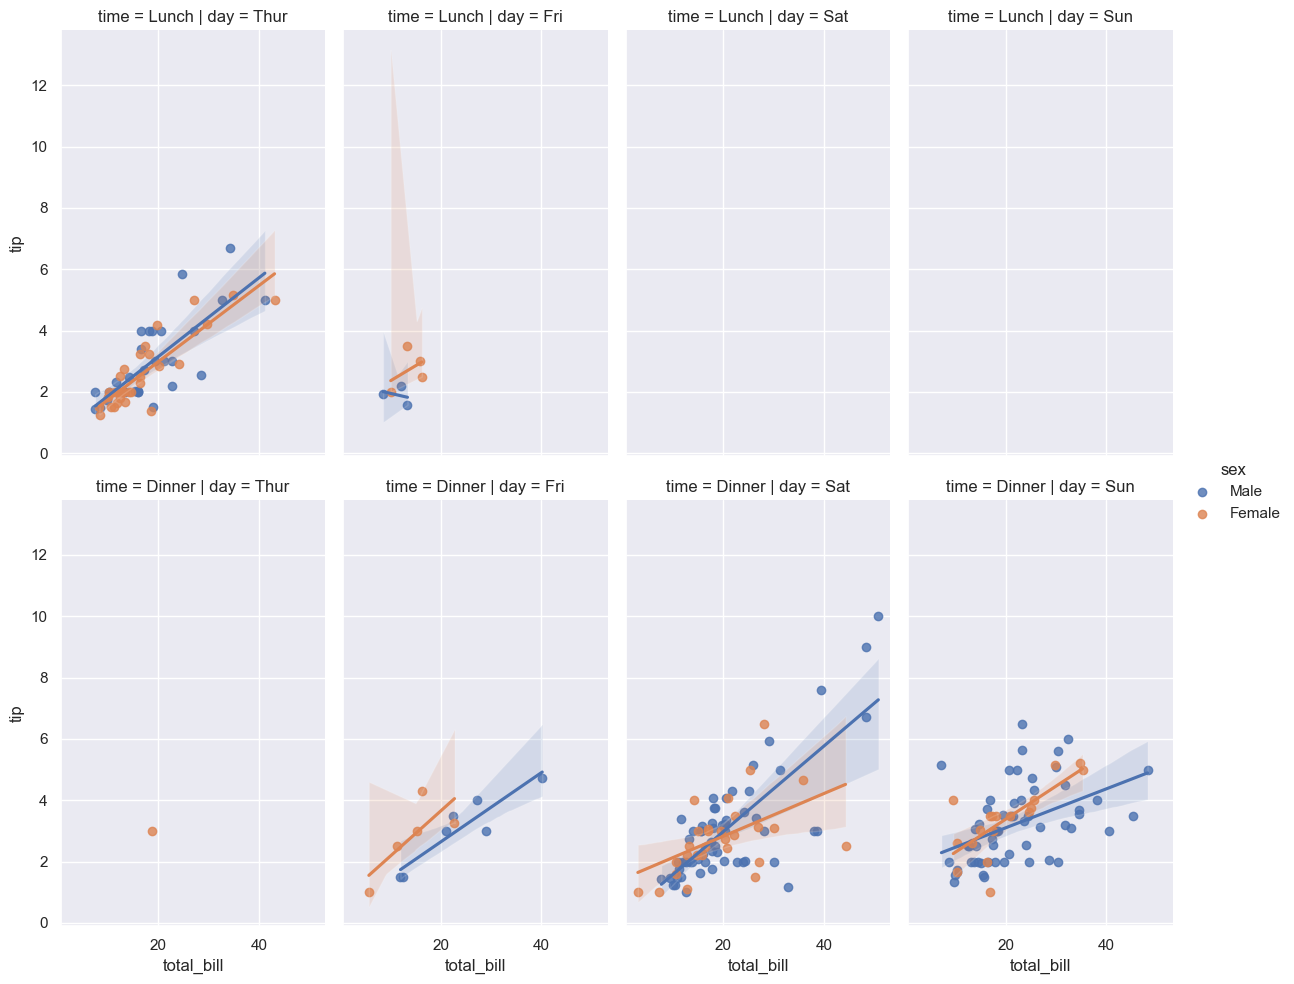

In [28]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', row='time', hue='sex',
          aspect=0.6)